# 3.2 线性回归的从零开始实现

In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
import torch

## 3.2.1 生成数据集

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(scale = 1,size=(num_examples,num_inputs)))
labels = true_w[0]*features[:,0] + true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(scale = 0.01,size = labels.shape))

In [3]:
features[0],labels[0]

(tensor([-0.2941,  0.0725], dtype=torch.float64),
 tensor(3.3562, dtype=torch.float64))

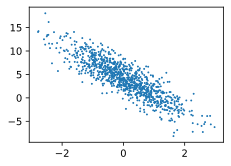

In [4]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    #设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1);

## 3.2.2 读取数据集


In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = np.array(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0, torch.tensor(j)), labels.index_select(0, torch.tensor(j)) #take函数根据索引返回对于元素

In [6]:
batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X,y)
    break

tensor([[-0.5653,  0.2351],
        [-0.0780,  2.8528],
        [ 1.3806,  1.1843],
        [ 0.5169, -1.0140],
        [ 1.1352, -0.8049],
        [ 0.4447,  0.9199],
        [ 0.0974, -0.1196],
        [ 0.2134,  0.2195],
        [-0.1539, -0.6107],
        [ 0.3614, -0.4677]], dtype=torch.float64) tensor([ 2.2730, -5.6579,  2.9272,  8.6827,  9.2028,  1.9452,  4.7818,  3.8878,
         5.9644,  6.5267], dtype=torch.float64)


## 3.2.3 初始化模型参数


In [7]:
w = torch.tensor(np.random.normal(scale=0.01,size = (num_inputs,1)))
b = torch.zeros(size = (1,))

In [8]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

## 3.2.4 定义模型

In [9]:
def linreg(X,w,b):
    return torch.mm(X,w)+b

## 3.2.5 定义损失函数

In [10]:
def square_loss(y_hat,y):
    return (y_hat - y.view(y_hat.shape))**2/2

## 3.2.6 定义优化算法


In [11]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data = param.data - lr*param.grad / batch_size

## 3.2.7 训练模型

In [12]:
lr = 0.03
num_epoch = 3
net = linreg
loss = square_loss

for epoch in range(num_epoch):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.zero_()
        b.grad.zero_()

    train_l = loss(net(features,w,b),labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.042591
epoch 2, loss 0.000174
epoch 3, loss 0.000049
